In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/Data Analysis')
print(os.listdir(os.getcwd()))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['data', 'Top 20 Businesses Frequented by VIPs.png', 'Network.ipynb', 'Data Preprocessing.ipynb', 'network.csv', 'network1.csv', 'network2.csv', 'network3.csv', 'business categories with most reviews from vips.ipynb', 'network4.csv', 'DA_review_VIP.ipynb', 'Restaurants attract users with lots of fans.ipynb']


In [0]:
import pandas as pd
import numpy as np
import json
import gc
from tqdm import tqdm_notebook as tqdm
import operator
import matplotlib.pyplot as plt

In [0]:
pd.set_option('display.max_columns', 100)
gc.enable()

In [0]:
user = pd.read_csv('data/round8/csv/user.csv', low_memory=False)

In [0]:
business = pd.read_csv('data/round8/csv/business.csv', low_memory=False)

In [0]:
business.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Take-out': True, 'Drive-Thru': False, 'Good ...",5UmKMjUEUNdYWqANhGckJw,"['Fast Food', 'Restaurants']",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Friday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
1,"{'Happy Hour': True, 'Accepts Credit Cards': T...",UsFtqoBl7naz8AVUBZMjQQ,['Nightlife'],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business
2,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"['Active Life', 'Mini Golf', 'Golf']",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354116,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,"{'Alcohol': 'full_bar', 'Noise Level': 'averag...",mVHrayjG3uZ_RLHkLj-AMg,"['Bars', 'American (New)', 'Nightlife', 'Loung...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{'Tuesday': {'close': '19:00', 'open': '10:00'...",40.408830,-79.866211,Emil's Lounge,[],True,26,4.5,PA,business
4,"{'Parking': {'garage': False, 'street': False,...",mYSpR_SLPgUVymYOvTQd_Q,"['Active Life', 'Golf']",Braddock,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Sunday': {'close': '15:00', 'open': '10:00'}...",40.403405,-79.855782,Grand View Golf Club,[],True,3,5.0,PA,business


In [0]:
review = pd.read_csv('data/round8/csv/review.csv', low_memory=False)

In [0]:
review.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 1, 'useful': 1, 'cool': 0}"
3,5UmKMjUEUNdYWqANhGckJw,2015-12-26,pVMIt0a_QsKtuDfWVfSk2A,3,PROS: Italian hoagie was delicious. Friendly ...,review,qiczib2fO_1VBG8IoCGvVg,"{'funny': 0, 'useful': 0, 'cool': 0}"
4,5UmKMjUEUNdYWqANhGckJw,2016-04-08,AEyiQ_Y44isJmNbMTyoMKQ,2,First the only reason this place could possibl...,review,qEE5EvV-f-s7yHC0Z4ydJQ,"{'funny': 0, 'useful': 1, 'cool': 0}"


## 输出在Arizona的存在business_id的business的id

In [0]:
business = pd.read_csv('data/round8/csv/business.csv', low_memory=False)
business_az = business[business['state'].astype(str).str.contains('AZ')]
business_az = business_az[business_az['business_id'].astype(str).str.len() > 0]
business_az_id = business_az['business_id'].tolist()

## 找出给Arizona的business做过评论的人，因为他们可能住在Arizona

In [0]:
review = pd.read_csv('data/round8/csv/review.csv', low_memory=False)
busi_user_tuple = review[["business_id", "user_id"]]
busi_to_user_dict = dict(busi_user_tuple.set_index('business_id').groupby(level = 0).\
    apply(lambda x : x.to_dict(orient= 'records')))

In [0]:
user_review_az = set()
for business in tqdm(business_az_id):
  try:
    for i in range(len(busi_to_user_dict[business])):
      user_review_az.add(busi_to_user_dict[business][i]['user_id'])
  except KeyError:
    pass

In [0]:
user_review_az

## 统计上面这些user做过评论的business地域，如果占最多的是AZ，那就可以假设他住在AZ

In [0]:
user_to_busi_dict = dict(busi_user_tuple.set_index('user_id').groupby(level = 0).\
    apply(lambda x : x.to_dict(orient= 'records')))

In [0]:
business = pd.read_csv('data/round8/csv/business.csv', low_memory=False)
busi_state_tuple = business[["business_id", "state"]]
busi_state_dict = busi_state_tuple.set_index("business_id").T.to_dict("list")

In [0]:
busi_state_dict

In [0]:
user_to_state_dict = {}
for user in tqdm(user_review_az):
  try:
    for i in range(len(user_to_busi_dict[user])):
      if user in user_to_state_dict:
        user_to_state_dict[user].append(busi_state_dict[user_to_busi_dict[user][i]['business_id']][0])
      else:
        user_to_state_dict[user] = [busi_state_dict[user_to_busi_dict[user][i]['business_id']][0]]
  except KeyError:
    pass

In [0]:
user_to_state_dict

In [0]:
from collections import Counter

user_livein_az = set()

for k, v in tqdm(user_to_state_dict.items()):
  if Counter(v).most_common(1)[0][0] == "AZ":
    user_livein_az.add(k)

In [0]:
len(user_livein_az)

236438

## 判断这些住在AZ的user的friends是否也都住在AZ，删除掉那些不在AZ的，留下住在AZ的，建立network

In [0]:
user = pd.read_csv('data/round8/csv/user.csv', low_memory=False)
user_friends_tuple = user[["user_id", "friends"]]
user_friends_dict = user_friends_tuple.set_index("user_id").T.to_dict("list")

In [0]:
import re
user_az_friends_dict = {}
for user in user_livein_az:
  user_az_friends_dict[user] = re.findall(r"'(.*?)'", user_friends_dict[user][0])

In [0]:
remove = []
for k, v in tqdm(user_az_friends_dict.items()):
  if len(v) == 0:
    remove.append(k)
    
for k in remove: 
  del user_az_friends_dict[k]

### 生成用户本人住在AZ并且他的friends也在AZ的字典

In [0]:
user_az_friends_az_dict = {}
for k, v in tqdm(user_az_friends_dict.items()):
  for friend in v:
    if friend in user_livein_az:
      if k in user_az_friends_az_dict:
        user_az_friends_az_dict[k].append(friend)
      else:
        user_az_friends_az_dict[k] = [friend]

In [0]:
len(user_az_friends_az_dict)

710

In [0]:
remove = []
for k, v in tqdm(user_az_friends_az_dict.items()):
  if len(v) < 100:
    remove.append(k)
    
for k in remove: 
  del user_az_friends_az_dict[k]

In [0]:
user = pd.read_csv('data/round8/csv/user.csv', low_memory=False)
user_name_dict = user[["user_id", "name"]].set_index("user_id").T.to_dict("list")

In [0]:
network_tuple = []
for k, v in tqdm(user_az_friends_az_dict.items()):
  for i in range(len(v)):
    network_tuple.append(tuple([user_name_dict[k][0], user_name_dict[v[i]][0]]))

### 导出network的csv

In [0]:
import csv
        
with open('AZ_friends_network_above_100_friends.csv', 'w') as f:
  writer = csv.writer(f, delimiter=';', lineterminator='\n')
  writer.writerows(network_tuple)

## --------------------

In [0]:
type(business_az)
nan_rows = business_az[business_az['neighborhoods'].isnull()]

In [0]:
len(business_az['business_id'])

36500

In [0]:
len(business_az[business_az['business_id'].astype(str).str.len() > 0])

36500

In [0]:
business_az.isnull().any()

In [0]:
user.head()

In [0]:
user.columns

Index(['average_stars', 'compliments', 'elite', 'fans', 'friends', 'name',
       'review_count', 'type', 'user_id', 'votes', 'yelping_since'],
      dtype='object')

In [0]:
user.index

RangeIndex(start=0, stop=686556, step=1)

In [0]:
user["friends"]

0         ['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...
1         ['18kPq7GPye-YQ3LyKyAZPw', '4U9kSBLuBDU391x6bx...
2         ['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...
3         ['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...
4         ['rpOyqD_893cqmDAtJLbdog', 'HDQixQ-WZEV0LVPJlI...
5         ['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...
6         ['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...
7         ['i63u3SdbrLsP4FxiSKP0Zw', 'lGrDfsaWl9IDUcEeUW...
8         ['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...
9         ['rpOyqD_893cqmDAtJLbdog', 'D4I0pZQ_8O4eWOqSeW...
10        ['4U9kSBLuBDU391x6bxU-YA', 'PMgE5Yqv7QL_cTjjIn...
11        ['XejvgD4CrkR7FeIkjwAjtQ', 'T7t5UdadpHua-YnmiF...
12        ['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...
13        ['E3Dr0kNwEuoBASEoad9Rpw', 'bTHiAdPYyCQenL5aCX...
14                               ['aQWaob3ROtUwLgnPdu-SdQ']
15                                                       []
16        ['DQwLhIKRSfNW-Gr9vrxDfg', 'NI

In [0]:
type(user["friends"])

pandas.core.series.Series

In [0]:
user["friends"][23].split(",")

['[]']

In [0]:
user["friends"][1637130]

'None'

In [0]:
friends_dict = {}
for i in tqdm(range(len(user["friends"]))):
  if len(user["friends"][i].split(",")) == 1 and user["friends"][i].split(",")[0] == "None":
    friends_dict[user.user_id[i]] = 0
  else:
    friends_dict[user.user_id[i]] = len(user["friends"][i].split(","))
    


In [0]:
friends_dict

{'l6BmjZMeQD3rDxWUbiAiow': 99,
 '4XChL029mKr5hydo79Ljxg': 1152,
 'bc8C_eETBWL0olvFSJJd0w': 15,
 'dD0gZpBctWGdWo9WlGuhlA': 525,
 'MM4RJAeH6yuaN8oZDSt0RA': 231,
 '0rK89TS8xqy1wI4nYI1wfw': 5450,
 'TEtzbpgA2BFBrC0y0sCbfw': 4326,
 'KGuqerdeNhxzXZEyBaqqSw': 1193,
 'T0gWkTHWRChVUe_Dn1F8nw': 382,
 'NQffx45eJaeqhFcMadKUQA': 898,
 'gvXtMj3XuPr0xHjgmlmtng': 194,
 '_DaFdmq0gtXf1spn1qC_1Q': 83,
 'FTWKZZeLb_0ZJRXQg8WADw': 582,
 'US0VOSMFs9U0Nkl5Vx1EzA': 25,
 'fktnDzpjYBUG5a-w_xq01A': 248,
 'iPJAN6rJHv92WE2h9b3lAA': 367,
 'AWCY8laHjH0-3HMT0LGpUA': 286,
 'CXi7I5J-ItLGJNyKPkI5gA': 258,
 '3TJcP0stfxjWGsLuGQgQdg': 3451,
 'hQ98T_hy1CoSWw55zA49VQ': 46,
 'zzpgpo54-_P-4rzzBtOuLQ': 418,
 'pU6GoRTcl1rIOi6zMynjog': 694,
 'Ps_zkoSnuv2Gy-QIt0jEJg': 1098,
 '_ICqwy7SW8J6OJBab1HkwA': 287,
 'J9HamWsxKorlPGUAXy-M9Q': 273,
 't8Whyn2ZWS34TxHsr2mpbg': 40,
 'nRagjGVuSALgQ4KfGLn8Ig': 209,
 'djQLJTLA4Tx7TpzYCKIqJQ': 101,
 'xxhjX14h8cQyKSuTQFy1Lg': 484,
 'a643pisN3QSjofk1Jmlo_Q': 455,
 'z5y4ejvC8uaUg5fGEJHbRA': 67,
 'DvIlmSl

In [0]:
dict(list(friends_dict.items())[0:10])

{'0rK89TS8xqy1wI4nYI1wfw': 5450,
 '4XChL029mKr5hydo79Ljxg': 1152,
 'KGuqerdeNhxzXZEyBaqqSw': 1193,
 'MM4RJAeH6yuaN8oZDSt0RA': 231,
 'NQffx45eJaeqhFcMadKUQA': 898,
 'T0gWkTHWRChVUe_Dn1F8nw': 382,
 'TEtzbpgA2BFBrC0y0sCbfw': 4326,
 'bc8C_eETBWL0olvFSJJd0w': 15,
 'dD0gZpBctWGdWo9WlGuhlA': 525,
 'l6BmjZMeQD3rDxWUbiAiow': 99}

In [0]:
dict_sort_by_value = sorted(friends_dict.items(), key=lambda x:x[1], reverse=True)

In [0]:
dict_sort_by_value

[('qVc8ODYU5SZjKXVBgXdI7w', 14995),
 ('iLjMdZi0Tm7DQxX1C1_2dg', 12200),
 ('ZIOCmdFaMIF56FR-nWr_2A', 9564),
 ('mV4lknblF-zOKSF8nlGqDA', 9068),
 ('IU86PZPgTDCFwJEuAg2j7g', 8641),
 ('F_5_UNX-wrAFCXuAkBZRDw', 8586),
 ('djxnI8Ux8ZYQJhiOQkrRhA', 8381),
 ('Oi1qbcz2m2SnwUeztGYcnQ', 8297),
 ('c-Dja5bexzEWBufNsHfRrQ', 8182),
 ('wEE-YMx5pmSuagLtNxMPKA', 7906),
 ('fgwI3rYHOv1ipfVfCSx7pg', 7905),
 ('UUqGHQFu2tQDGv5r3yJWPA', 7854),
 ('MeDuKsZcnI3IU2g7OlV-hQ', 7613),
 ('Ve0LUwcrzxL7w0RYgY4Aaw', 7401),
 ('UsXqCXRZwSCSw0AT7y1uBg', 7394),
 ('5MCBLBxr10NLUKZ4AboAMg', 7154),
 ('xsT4KZTu_KnOVavtuXn4RA', 6918),
 ('VHdY6oG2JPVNjihWhOooAQ', 6873),
 ('hizGc5W1tBHPghM5YKCAtg', 6852),
 ('nkN_do3fJ9xekchVC-v68A', 6772),
 ('YttDgOC9AlM4HcAlDsbB2A', 6758),
 ('MX_sGTpLIQ0EOcvK73nRyA', 6750),
 ('3zxy3LVBV3ttxoYbY4rQ8A', 6743),
 ('peuxbSQwXed-81cSqL7Ykw', 6723),
 ('o5STsEtfvD1Ig0J7Z-1uxA', 6687),
 ('IDVFG1pNSHIHoVuoLuZpcQ', 6624),
 ('9HGR8sU_zm15sI109H-SGQ', 6576),
 ('1vXJWH7L0IMEz5-8aU3SOA', 6559),
 ('AHRrG3T1gJpHvtp

In [0]:
fan_num = [x[1] for x in dict_sort_by_value]

In [0]:
fan_num

[14995,
 12200,
 9564,
 9068,
 8641,
 8586,
 8381,
 8297,
 8182,
 7906,
 7905,
 7854,
 7613,
 7401,
 7394,
 7154,
 6918,
 6873,
 6852,
 6772,
 6758,
 6750,
 6743,
 6723,
 6687,
 6624,
 6576,
 6559,
 6517,
 6506,
 6413,
 6383,
 6244,
 6200,
 6187,
 6183,
 6095,
 6075,
 6066,
 6065,
 6063,
 6026,
 6021,
 6017,
 6012,
 6009,
 6003,
 5987,
 5977,
 5947,
 5903,
 5901,
 5864,
 5851,
 5847,
 5846,
 5829,
 5821,
 5817,
 5785,
 5782,
 5773,
 5762,
 5757,
 5743,
 5731,
 5709,
 5706,
 5706,
 5676,
 5671,
 5646,
 5645,
 5637,
 5627,
 5612,
 5604,
 5600,
 5596,
 5591,
 5581,
 5574,
 5567,
 5566,
 5530,
 5528,
 5517,
 5498,
 5485,
 5484,
 5465,
 5450,
 5435,
 5428,
 5428,
 5422,
 5417,
 5408,
 5388,
 5379,
 5368,
 5352,
 5348,
 5337,
 5306,
 5301,
 5297,
 5292,
 5292,
 5282,
 5276,
 5276,
 5273,
 5250,
 5249,
 5232,
 5218,
 5212,
 5211,
 5210,
 5207,
 5174,
 5168,
 5166,
 5160,
 5158,
 5157,
 5130,
 5114,
 5101,
 5092,
 5083,
 5082,
 5070,
 5058,
 5050,
 5028,
 5025,
 5018,
 5017,
 4996,
 4979,
 497

In [0]:
len(fan_num)

1637135

In [0]:
# exclude all value = 0
fan_num = [x for x in fan_num if x > 0]

In [0]:
len(fan_num)

948075

In [0]:
# adjust weights for each element
weight = [None] * len(fan_num)
for i in tqdm(range(len(fan_num))):
  if fan_num[i] < 1000:
    weight[i] = 0.1
  elif 1000 <= fan_num[i] < 2000:
    weight[i] = 10
  elif 2000 <= fan_num[i] < 3000:
    weight[i] = 20
  elif 3000 <= fan_num[i] < 4000:
    weight[i] = 30
  elif 4000 <= fan_num[i] < 5000:
    weight[i] = 40
  elif 5000 <= fan_num[i] < 6000:
    weight[i] = 50
  elif 6000 <= fan_num[i] < 7000:
    weight[i] = 60
  elif 7000 <= fan_num[i] < 8000:
    weight[i] = 70
  elif 8000 <= fan_num[i] < 9000:
    weight[i] = 80
  elif 9000 <= fan_num[i] < 10000:
    weight[i] = 90
  else:
    weight[i] = 100

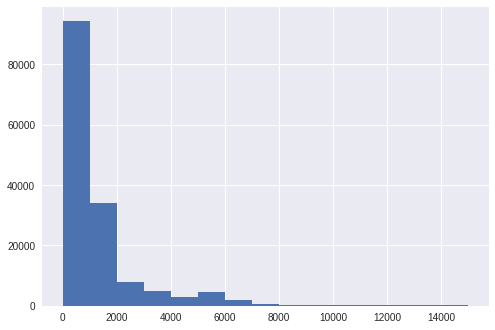

In [0]:

n, bins, patches = plt.hist(fan_num,  density=False, bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000],range=(0,max(fan_num)), weights = weight)

In [0]:
n.tolist()

[94390.00000008511,
 34019.999999999985,
 7980.0,
 4770.000000000029,
 3000.0,
 4650.0,
 1860.0,
 490.0,
 400.0,
 180.0,
 200.0]

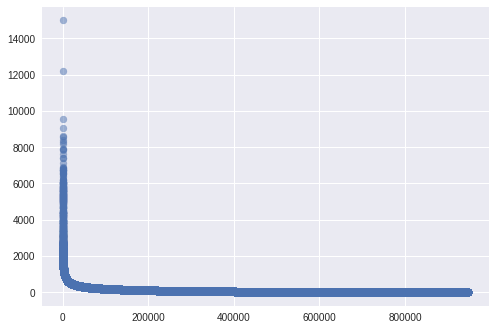

In [0]:
x = np.linspace(1, len(fan_num), num=len(fan_num))
y = fan_num
plt.scatter(x, y, alpha=0.5)
plt.show()

In [0]:
dtypes = {
        'review_id':                                  'str',
        'user_id':                                    'str',
        'business_id':                                'str',
        'stars':                                      'float16',
        'useful':                                     'float16',
        'funny':                                      'float16',
        'cool':                                       'float16',
        'text':                                       'str',
        'date':                                       'str'
}
review = pd.read_csv('data/No_null/review_no_null.csv', dtype=dtypes)

In [0]:
gc.collect()

2208

In [0]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0.0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0.0,2017-01-14 21:30:33,0.0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0.0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0.0,2016-11-09 20:09:03,0.0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3.0,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0.0,2018-01-09 20:56:38,0.0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0.0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0.0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7.0,ssoyf2_x0EQMed6fgHeMyQ


In [0]:
busi_user_tuple = review[["business_id", "user_id"]]

In [0]:
# busi_user_dic.set_index("user_id").T.to_dict("list")

In [0]:
busi_user_tuple = busi_user_tuple.values.tolist()

In [0]:
busi_user_tuple

[['ujmEBvifdJM6h6RLv4wQIg', 'hG7b0MtEbXx5QzbzE6C_VA'],
 ['NZnhc2sEQy3RmzKTZnqtwQ', 'yXQM5uF2jS6es16SJzNHfg'],
 ['WTqjgwHlXbSFevF32_DJVw', 'n6-Gk65cPZL6Uz8qRm3NYw'],
 ['ikCg8xy5JIg_NGPx-MSIDA', 'dacAIZ6fTM6mqwW5uxkskg'],
 ['b1b1eb3uo-w561D0ZfCEiQ', 'ssoyf2_x0EQMed6fgHeMyQ'],
 ['eU_713ec6fTGNO4BegRaww', 'w31MKYsNFMrjhWxxAb5wIw'],
 ['3fw2X5bZYeW9xCz_zGhOHg', 'jlu4CztcSxrKx56ba1a5AQ'],
 ['zvO-PJCpNk4fgAVUnExYAA', 'd6xvYpyzcfbF_AZ8vMB7QA'],
 ['b2jN2mm9Wf3RcrZCgfo1cg', 'sG_h0dIzTKWa3Q6fmb4u-g'],
 ['oxwGyA17NL6c5t1Etg5WgQ', 'nMeCE5-xsdleyxYuNZ_7rA'],
 ['8mIrX_LrOnAqWsB5JrOojQ', 'FIk4lQQu1eTe2EpzQ4xhBA'],
 ['mRUVMJkUGxrByzMQ2MuOpA', '-mA3-1mN4JIEkqOtdbNXCQ'],
 ['FxLfqxdYPA6Z85PFKaqLrg', 'GYNnVehQeXjty0xH7-6Fhw'],
 ['LUN6swQYa4xJKaM_UEUOEw', 'bAhqAPoWaZYcyYi7bs024Q'],
 ['AakkkTuGZA2KBodKi2_u8A', 'TpyOT5E16YASd7EWjLQlrw'],
 ['YvrylyuWgbP90RgMqZQVnQ', 'NJlxGtouq06hhC7sS2ECYw'],
 ['NyLYY8q1-H3hfsTwuwLPCg', '86J5DwcFk4f4In1Vxe2TvA'],
 ['cHdJXLlKNWixBXpDwEGb_A', 'JSrP-dUmLlwZiI7Dp3PQ2A'],
 ['6lj2BJ4

In [0]:
users_set = set()
for i in tqdm(range(len(busi_user_tuple))):
  users_set.add(busi_user_tuple[i][1])

In [0]:
# top users with many fans
top_1000_user = [top_1000_user[0] for top_1000_user in dict_sort_by_value[0:1000]]

In [0]:
user_busi_dict = {}
for user_id in tqdm(top_1000_user):
  for i in range(len(busi_user_tuple)):
    if busi_user_tuple[i][1] == user_id:
      if user_id in user_busi_dict:
        user_busi_dict[user_id].append(busi_user_tuple[i][0])
      else:
        user_busi_dict[user_id] = [busi_user_tuple[i][0]]

In [0]:
user_busi_dict

{'qVc8ODYU5SZjKXVBgXdI7w': ['3T0Erqk1MKtN58764yZMfw',
  'K-uQkfSUTwu5LIwPB4b_vg'],
 'iLjMdZi0Tm7DQxX1C1_2dg': ['eoG9zP7xxsDHVM0kJYrvkw',
  'flE7Sn2JGs0n3SAtaep6Zw',
  'zgQHtqX0gqMw1nlBZl2VnQ',
  'B56AYe5GNuavMDtwFsXqzA',
  'J4_q5iMukg-UnnLnT6ZwAA',
  'RwMLuOkImBIqqYj4SSKSPg',
  'Z2iYtj0ybh_ovOyRD8bjMg',
  'X_siTA_5pEvKUpNhYcxXOw',
  'xM5jI2jE7-R-qhP9CxriwA',
  '2hEm6QSFvHhVrrRYal6R4Q',
  'BQZ-KkZilWvOGG8-kGzsfw',
  'V96iWEiPOMLOSQgO4x2rfQ',
  'H464UiJ5c7q5dAJ14h731A',
  'aOaRYBPVrQFSvE3ovl-LEw',
  'JmI9nslLD7KZqRr__Bg6NQ',
  'PvlNlR7DbdaMAsD1MrL65A',
  '4GXII-GU7S0ZyU6ElkhscQ',
  '7gnYWanhD6O7qOF-NfPNhA',
  'mniDh2RoXlN9l0g-B6-W-g',
  '5PvGnYei472JPtY3FKTgRA'],
 'ZIOCmdFaMIF56FR-nWr_2A': ['rvnTFEq7R2ZHg0_CYbBNFw',
  'a4GRh1TlOVhPD401mSPLZg',
  'XXW_OFaYQkkGOGniujZFHg',
  '_j2EtQtgLuXGRBfbM5YwZA',
  'vzrcPqSdRY41GoO5DR5pYA',
  'sKhDrZFCJqfRNylkHrIDsQ',
  '6Toez65egZSMV1iohQWGIQ',
  'qmymSqVwHYRqdwfcBatzpQ',
  'A4zLP5AyKEEHQr_dWEZKig',
  'k-dDZvTeLysoJvjHI-qr9g',
  'Wxxvi3LZbHNIDwJ-Zimtn

In [0]:
# list(user_busi_dict.values())

In [0]:
busi_for_V = set()
for k, v in user_busi_dict.items():
  busi_for_V.update(v)

In [0]:
len(busi_for_V)

27874

In [0]:
busi_attract_count = {} 
for business in tqdm(busi_for_V):
  count = 0
  for k, v in user_busi_dict.items():
    if business in v:
      count += 1
  busi_attract_count[business] = count

In [0]:
busi_attract_count = sorted(busi_attract_count.items(), key=lambda x:x[1], reverse=True)

In [0]:
busi_attract_count

[('FaHADZARwnY4yvlvpnsfGA', 167),
 ('JmI9nslLD7KZqRr__Bg6NQ', 106),
 ('5LNZ67Yw9RD6nf4_UhXOjw', 104),
 ('DkYS3arLOhA8si5uUEmHOw', 101),
 ('4JNXUYY8wbaaDmk3BPzlWw', 98),
 ('Wxxvi3LZbHNIDwJ-ZimtnA', 89),
 ('2weQS-RnoOBhb1KsHKyoSQ', 88),
 ('RESDUcs7fIiihp38-d6_6g', 85),
 ('K7lWdNUhCbcnEvI0NhGewg', 84),
 ('El4FC8jcawUVgw_0EIcbaQ', 79),
 ('iCQpiavjjPzJ5_3gPD5Ebg', 76),
 ('MpmFFw0GE_2iRFPdsRpJbA', 75),
 ('SMPbvZLSMMb7KU76YNYMGg', 72),
 ('na4Th5DrNauOv-c43QQFvA', 70),
 ('t-o_Sraneime4DDhWrQRBA', 68),
 ('VyjyHoBg3KC5BSFRlD0ZPQ', 67),
 ('ujHiaprwCQ5ewziu0Vi9rw', 66),
 ('ii8sAGBexBOJoYRFafF9XQ', 64),
 ('P7pxQFqr7yBKMMI2J51udw', 64),
 ('BLIJ-p5wYuAhw6Pp6mh6mw', 63),
 ('rcaPajgKOJC2vo_l3xa42A', 63),
 ('eAc9Vd6loOgRQolMXQt6FA', 62),
 ('WUq8HJHIZU4uteB154XN7w', 62),
 ('NCFwm2-TDb-oBQ2medmYDg', 62),
 ('ECOkEVUodMLUxvI0PMI4gQ', 60),
 ('NvKNe9DnQavC9GstglcBJQ', 59),
 ('3xmfT7l3xNH5LK1dLzfvGw', 58),
 ('yQab5dxZzgBLTEHCw9V7_w', 58),
 ('eoHdUeQDNgQ6WYEnP2aiRw', 57),
 ('cYwJA2A6I12KNkm2rtXd5g', 56),
 ('qjn

In [0]:
busi_attract = [x[0] for x in busi_attract_count]

In [0]:
busi_count = [x[1] for x in busi_attract_count]

In [0]:
dtypes = {
        'address':                                    'str',
        'attributes':                                 'category',
        'business_id':                                'str',
        'categories':                                 'category',
        'city':                                       'str',
        'hours':                                      'category',
        'is_open':                                    'int8',
        'latitude':                                   'float16',
        'longitude':                                  'float16',
        'name':                                       'str',
        'postal_code':                                'str',
        'review_count':                               'int8',
        'stars':                                      'float16',
        'state':                                      'str'
}
business = pd.read_csv('data/No_null/business_no_null.csv', dtype=dtypes)

In [0]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.59375,-79.6250,Emerald Chinese Restaurant,L5R 3E7,-128,2.5,ON
1,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.09375,-80.8750,Musashi Japanese Restaurant,28210,-86,4.0,NC
2,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.18750,-80.8750,Queen City Plumbing,28217,4,4.0,NC
3,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': ""{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.59375,-79.6875,The UPS Store,L5V 0B1,3,2.5,ON
4,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.09375,-115.0625,Supercuts,89121,3,3.5,NV


In [0]:
name_busi_dict = business[["name", "business_id"]].set_index("business_id").T.to_dict("list")

In [0]:
name_busi_dict["JmI9nslLD7KZqRr__Bg6NQ"]

['Phoenix Sky Harbor International Airport']

In [0]:
pop_busi = []
for bus in busi_attract[0:20]:
  pop_busi.append(name_busi_dict[bus])

In [0]:
list(np.array(pop_busi).flatten())

['McCarran International Airport',
 'Phoenix Sky Harbor International Airport',
 'The Cosmopolitan of Las Vegas',
 'Earl of Sandwich',
 'Mon Ami Gabi',
 'The Venetian Las Vegas',
 'The Buffet',
 'Bacchanal Buffet',
 'Wicked Spoon',
 'MGM Grand Hotel',
 'Secret Pizza',
 'XS Nightclub',
 'ARIA Resort & Casino',
 'Bellagio Hotel',
 'Wynn Las Vegas',
 'Caesars Palace Las Vegas Hotel & Casino',
 'The Buffet at Bellagio',
 'Paris Las Vegas Hotel & Casino',
 'Holsteins',
 'Planet Hollywood Las Vegas Resort & Casino']

In [0]:
pop_busi

[['McCarran International Airport'],
 ['Phoenix Sky Harbor International Airport'],
 ['The Cosmopolitan of Las Vegas'],
 ['Earl of Sandwich'],
 ['Mon Ami Gabi'],
 ['The Venetian Las Vegas'],
 ['The Buffet'],
 ['Bacchanal Buffet'],
 ['Wicked Spoon'],
 ['MGM Grand Hotel'],
 ['Secret Pizza'],
 ['XS Nightclub'],
 ['ARIA Resort & Casino'],
 ['Bellagio Hotel'],
 ['Wynn Las Vegas'],
 ['Caesars Palace Las Vegas Hotel & Casino'],
 ['The Buffet at Bellagio'],
 ['Paris Las Vegas Hotel & Casino'],
 ['Holsteins'],
 ['Planet Hollywood Las Vegas Resort & Casino']]

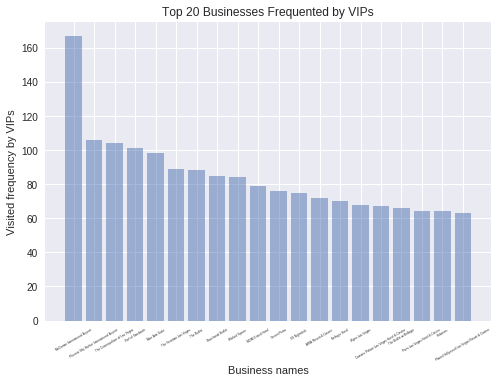

In [0]:
objects = list(np.array(pop_busi).flatten())
y_pos = np.arange(len(objects))
performance = busi_count[0:20]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, fontsize=3, rotation=30)
plt.ylabel('Visited frequency by VIPs')
plt.xlabel('Business names')
plt.title('Top 20 Businesses Frequented by VIPs')

# plt.savefig("1.png", bbox_inches="tight")
plt.savefig('Top 20 Businesses Frequented by VIPs.png', dpi=1000, bbox_inches="tight")